# One Outlier (Section 4.1)

This file contains an experiment identifying a single influential point that can cause a sign flip, which AMIP fails to detect.

In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from linear_regression import LinearRegression

## Data Generation with intercept (i.e., an all-1's column).

In [255]:
np.random.seed(0)

# Generate Data
num_observations_pop_1 = 1
num_observations_pop_2 = 1000

# Generate the X values.
mean_pop_1 = np.array([1e6])
mean_pop_2 = np.array([0])
vars_pop_1 = np.array([[0]])
vars_pop_2 = [[1]]
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)

x = np.append(x1, x2, axis=0) 
x1_0 = [pt[0] for pt in x1]
x2_0 = [pt[0] for pt in x2]

# Add an intercept term.
df = pd.DataFrame(x)
df.insert(0, 'Ones', 1)
arr = df.values
x = arr
x1 = x[:1]
x2 = x[1:]

# Generating the Y values.
y1 = [1e6]

epsilon2 = np.random.normal(0, 1, num_observations_pop_2) # eps is the variance of the noise distribution.
slope = -1
intercept = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope*x2_0[i] + intercept + epsilon2[i]) # change here to add residual noise.

y = np.concatenate([y1, y2], axis=0)
y

array([ 1.00000000e+06,  4.92316679e-01, -1.40105281e+00, ...,
        5.70952564e-03, -9.52856295e-01, -2.08888373e+00])

## Data Generation without intercept (i.e., an all-1's column).

In [143]:
np.random.seed(0)

# Generate Data
num_observations_pop_1 = 1
num_observations_pop_2 = 1000

# Generate the X values.
mean_pop_1 = np.array([1e10])
mean_pop_2 = np.array([0])
vars_pop_1 = np.array([[0]])
vars_pop_2 = [[1]]
x1 = np.random.multivariate_normal(mean_pop_1, vars_pop_1, num_observations_pop_1)
x2 = np.random.multivariate_normal(mean_pop_2, vars_pop_2, num_observations_pop_2)

x = np.append(x1, x2, axis=0)
print(x)
x1 = x[:1]
x2 = x[1:]

# Add an intercept term.
# df = pd.DataFrame(x)
# df.insert(0, 'Ones', 1)
# arr = df.values
# x = arr

# Flatten x for ease of indexing.
x1_0 = x1.flatten()
x2_0 = x2.flatten()

# Generating the Y values.
y1 = [1e10]

epsilon2 = np.random.normal(0, 1, num_observations_pop_2) # eps is the variance of the noise distribution.
slope = -1
intercept = 0
y2 = []
for i in range(num_observations_pop_2):
    y2.append(slope*x2_0[i] + intercept + epsilon2[i]) # change here to add residual noise.

y = np.concatenate([y1, y2], axis=0)
y

[[ 1.00000000e+10]
 [ 7.29003924e-01]
 [ 2.17820788e-01]
 ...
 [-1.07227913e+00]
 [-8.38147753e-01]
 [-1.41869876e+00]]


array([ 1.00000000e+10, -8.89945584e-01, -3.88986151e-03, ...,
        3.56985597e-01,  1.43549595e+00,  1.57705300e-01])

## Model Fitting

Fit the data using OLS regression.

In [256]:
lr = LinearRegression(x=x.T, y=y)
lr.fit()
modified_lr_a = LinearRegression(x=x1.T, y=y1)
modified_lr_a.fit()
modified_lr = LinearRegression(x=x2.T, y=y2)
modified_lr.fit()
print(
    f"Estimated beta1 with full dataset: {lr.beta[1]}\n" # with intercept (lr.beta[1]), without intercept (lr.beta[0])
    f"Estimated beta1 pop A: {modified_lr_a.beta[1]}\n"
    f"Estimated beta1 pop B: {modified_lr.beta[1]}"
)

Estimated beta1 with full dataset: 0.9999998935657151
Estimated beta1 pop A: 0.999999999999
Estimated beta1 pop B: -1.0329686114061063


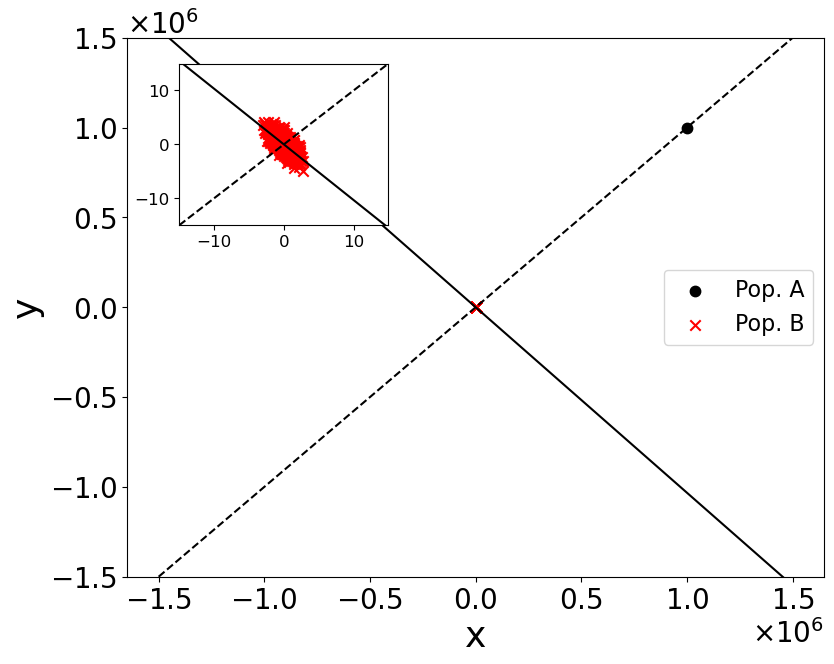

In [ ]:
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(9, 7))

x_values = np.linspace(-1.5e6, 1.5e6, 100)
y_values_full = lr.beta[1] * x_values
y_value_red_crosses = modified_lr.beta[1] * x_values

plt.plot(x_values, y_values_full, color='black', linestyle='--') 
plt.plot(x_values, y_value_red_crosses, color='black')
plt.scatter(x1_0, y1, marker='o', color='black', label='Pop. A', s=56)
plt.scatter(x2_0, y2, marker='x', color='r', label='Pop. B', s=56)

plt.ylim(-1.5e6, 1.5e6)

plt.xlabel('x', fontsize=26) 
plt.ylabel('y', fontsize=26)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_offset_text().set_fontsize(20)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().xaxis.get_offset_text().set_fontsize(20)

plt.legend(fontsize=16)

# Create inset of the red crosses.
x_values_inset = np.linspace(-15, 15, 100)
y_values_full_inset = lr.beta[1] * x_values_inset
y_value_red_crosses_inset = modified_lr.beta[1] * x_values_inset

ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc='upper left', bbox_to_anchor=(0.065, -0.035, 1.0, 1), bbox_transform=plt.gca().transAxes)
ax_inset.plot(x_values_inset, y_values_full_inset, color='black', linestyle='--') 
ax_inset.plot(x_values_inset, y_value_red_crosses_inset, color='black')
ax_inset.scatter(x1_0, y1, marker='o', color='black', s=56)
ax_inset.scatter(x2_0, y2, marker='x', color='r', s=56)
ax_inset.set_xlim(-15, 15)  
ax_inset.set_ylim(-15, 15)
ax_inset.tick_params(axis='both', which='major', labelsize=12)
ax_inset.tick_params(axis='both', which='minor', labelsize=12)

# plt.savefig('one_outlier_example_6.pdf')
plt.show()

## Additive and Greedy algorithms.


In [244]:
def compute_scores(x, y, lr):
    '''
    x: design matrix.
    y: response vector.
    lr: linear regression model.
    '''
    # compute statistics.
    intercept = [pt[0] for pt in x]
    xcoordinate = [pt[1] for pt in x]
    xcoordinate = np.array(xcoordinate)
    residuals = lr.residual()
    leverages = lr.leverage_scores()
    if_scores = -lr.influence_scores()[1]
    newton_scores = -lr.one_step_newton()[1]
    xtxinvx = -lr.schmeverage_scores(np.array([[0], [1]]))
    xtxinvx = np.array(xtxinvx)

    # sort indices in ascending order of influence scores.
    # the most negative influence score corresponds to the most influential point.
    if_inds = np.argsort(if_scores)
    newton_inds = np.argsort(newton_scores)

    # sort statistics according to influence score order.
    sorted_x = xcoordinate[if_inds]
    sorted_y = y[if_inds]
    sorted_residuals = residuals[if_inds]
    sorted_leverages = leverages[if_inds]
    sorted_if_scores = if_scores[if_inds]
    sorted_newton_scores = newton_scores[if_inds] # sort the 1Exact scores according to if_inds 
    # to see the true effect of dropping a point, ranked in ascending order of influence scores.
    sorted_xtxinvx = xtxinvx[if_inds]

    # create a df with residuals, leverages, and coordinates.
    orig_df = pd.DataFrame({'x': xcoordinate, 'y': y, 
                            'residual': residuals, 'leverage': leverages, 'xtxinvx': xtxinvx,
                            'IF': if_scores, '1Exact': newton_scores,
                            'sorted_IF_indices': if_inds, 'sorted_1Exact_indices': newton_inds, 
                            'sorted_x': sorted_x, 'sorted_y': sorted_y,
                            "sorted_residuals": sorted_residuals, "sorted_leverages": sorted_leverages, 'sorted_xtxinvx': sorted_xtxinvx,
                            'sorted_IF_scores': sorted_if_scores, 'sorted_1Exact_scores': sorted_newton_scores,
                            })
    return orig_df

#### Additive Algorithms.

In [252]:
outlier_df = compute_scores(x, y, lr)
outlier_df.head(10)

,x,y,residual,leverage,xtxinvx,IF,1Exact,sorted_IF_indices,sorted_1Exact_indices,sorted_x,sorted_y,sorted_residuals,sorted_leverages,sorted_xtxinvx,sorted_IF_scores,sorted_1Exact_scores
0,1000000.000000,1000000.000000,0.001975,1.000,-1.000000e-06,-1.974664e-09,-2.032970e+00,494,0,2.696224,-4.854293,-7.654976,0.001,9.972545e-10,-7.633959e-09,-7.641601e-09
1,0.400157,0.492317,-0.012300,0.001,9.995529e-10,-1.229461e-11,-1.230691e-11,198,494,2.163236,-4.175116,-6.442812,0.001,9.977880e-10,-6.428560e-09,-6.434995e-09
2,0.978738,-1.401053,-2.484250,0.001,9.989737e-10,-2.481701e-09,-2.484185e-09,689,198,2.380745,-3.786850,-6.272055,0.001,9.975703e-10,-6.256816e-09,-6.263079e-09
3,2.240893,-2.136179,-4.481532,0.001,9.977103e-10,-4.471270e-09,-4.475746e-09,943,689,2.759355,-3.116934,-5.980749,0.001,9.971913e-10,-5.963951e-09,-5.969921e-09
4,1.867558,-1.639505,-3.611522,0.001,9.980840e-10,-3.604602e-09,-3.608211e-09,418,943,1.519995,-4.322198,-5.946652,0.001,9.984319e-10,-5.937327e-09,-5.943270e-09
5,-0.977278,1.178758,2.051576,0.001,1.000932e-09,2.053487e-09,2.055543e-09,218,418,2.259309,-3.454296,-5.818064,0.001,9.976919e-10,-5.804635e-09,-5.810446e-09
6,0.950088,-0.409315,-1.463863,0.001,9.990024e-10,-1.462402e-09,-1.463866e-09,465,218,2.412454,-3.067999,-5.584912,0.001,9.975386e-10,-5.571165e-09,-5.576742e-09
7,-0.151357,-1.666720,-1.619823,0.001,1.000105e-09,-1.619993e-09,-1.621614e-09,113,465,1.910065,-3.405744,-5.420269,0.001,9.980415e-10,-5.409653e-09,-5.415068e-09
8,-0.103219,0.053895,0.052654,0.001,1.000057e-09,5.265699e-11,5.270970e-11,952,113,1.401345,-3.580276,-5.086081,0.001,9.985507e-10,-5.078709e-09,-5.083793e-09
9,0.410599,-0.171565,-0.686623,0.001,9.995424e-10,-6.863088e-10,-6.869958e-10,151,952,1.713343,-3.244146,-5.061948,0.001,9.982384e-10,-5.053031e-09,-5.058089e-09


In [171]:
# Influence score for black dot.
print('Influence score for black dot', (outlier_df['residual'][0] * outlier_df['leverage'][0]) / outlier_df['x'][0])
# Influence score for red cross with the largest influence score.
print('Influence score for red cross with the largest influence score', (outlier_df['sorted_residuals'][0] * outlier_df['sorted_leverages'][0]) / outlier_df['sorted_x'][0])

Influence score for black dot 0.15589535917318348
Influence score for red cross with the largest influence score -0.004587124032197648


- at x = y = 1e3 AMIP fails in type 1 but not type 2 (correct ordering).
- at x = y = 1e6 AMIP fails in type 1 and type 2 (incorrect ordering).

In [46]:
print(f'The AMIP approximation of the refit is {round(lr.beta[1] + sum(outlier_df["sorted_IF_scores"][:1]), 4)}.')
print(f'The Add-1Exact for the change induced by dropping the worst-case subset of size at most 1 is {round(lr.beta[1] + sum(outlier_df["sorted_1Exact_scores"][:1]), 4)}.')
print(f'The true change induced by dropping the worst-case subset of size at most 1 is {round((modified_lr.beta[1]), 4)}.')

The AMIP approximation of the refit is 0.9807.
The Add-1Exact for the change induced by dropping the worst-case subset of size at most 1 is -1.0012.
The true change induced by dropping the worst-case subset of size at most 1 is -1.0012.


#### Greedy Algorithms.

Greedy approximations for 1 data point is the same as the additive approximations.


## For Creating the Table and Leverage Plot in Appendix.

In [62]:
### Helpers.
def plot_regression(x, y, x1, y1, x2, y2):
    ## X vs Y
    plt.scatter(x1[0], y1, marker='o', color='black', label='Pop. A', s=56)
    plt.scatter(x2[0], y2, marker='x', color='r', label='Pop. B', s=56)
    # plt.title('One-dimensional Example')
    
    plt.xlabel('x', fontsize=22)  # Larger font for x-axis label
    plt.ylabel('y', fontsize=22)  # Larger font for y-axis label
    
    # Set the size of tick marks
    plt.xticks(fontsize=12)  # Larger ticks for x-axis
    plt.yticks(fontsize=12)  # Larger ticks for y-axis
    
    plt.legend(fontsize=22)

    plt.show()

    x = x.T
    lr = LinearRegression(x=x.T, y=y)
    lr.fit()
    print(
        f"Beta with full dataset: {lr.beta[0]}"
    )

    # Dropping just x1 should change the analysis (based on data generating process)
    modified_lr = LinearRegression(x=x2, y=y2) # Drop Pop_1 data
    modified_lr.fit()
    print(
        f"Beta with subset dropped: {modified_lr.beta[0]}"
    )
    
    return lr

def make_df(lr):
    # III. Compute influence scores and Newton scores for first coefficient.
    scores = -lr.influence_scores()[0] # after adding an intercept term, take the scores of coefficient 1.
    newton_scores = -lr.one_step_newton()[0]

    # sort indices in ascending order (influence scores are negative, so the largest magnitude scores appear first.)
    inds = np.argsort(scores)
    # print("inds", inds[:10])
    original_inds = inds # original_inds

    newton_inds = np.argsort(newton_scores)
    # print("newton inds", newton_inds[:10])
    original_newton_inds = newton_inds 

    # sort scores.
    sorted_scores = scores[inds]
    # print("sorted_scores", sorted(scores)[:10])
    original_sorted_scores = sorted_scores

    sorted_newton_scores = newton_scores[inds]
    # print("sorted_newton_scores", sorted_newton_scores[:10])
    original_sorted_newton_scores = sorted_newton_scores
    
    # influential point
    outlier_x = np.squeeze(x1[0][0])
    outlier_y = np.squeeze(y1[0][0])
    print(f"outlier_x: {outlier_x}")
    print(f"outlier_y: {outlier_y}")
    # residuals
    residuals = lr.residual()
    # print(f"outlier_residual: {round(residuals[0], 4)}")
    # leverages
    leverages = lr.leverage_scores()
    # print(f"outlier_leverage: {round(leverages[0], 4)}")
    # schmeverage e1
    shmeverage_e1 = lr.schmeverage_scores([(1,)])
    # print(f'schmeverage_e1: {round(shmeverage_e1[0], 4)}')
    # Compute influence functions for first coefficient
    scores = -lr.influence_scores()[0] # effect of removing a data point on beta1.
    # print("outlier influence score:", round(scores[0], 4))
    leverage_correction = 1 / (1 - leverages)


    # create a df with residuals, leverages, and coordinates.
    orig_df = pd.DataFrame({'x': x.flatten(), 'y':y.flatten(),
                            'residual': residuals, 'schmeverage': shmeverage_e1,
                            'leverage': leverages, 'leverage_correction': leverage_correction,
                            'influence': scores, 'newton': newton_scores})
    
    return orig_df

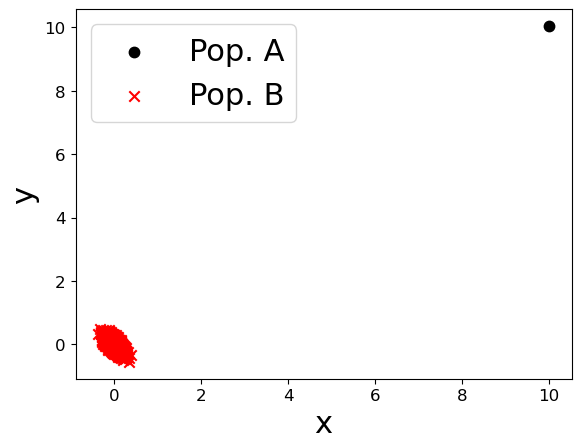

Beta with full dataset: [0.34967025]
Beta with subset dropped: [-0.99827176]
outlier_x: 10
outlier_y: 10.041440587671698


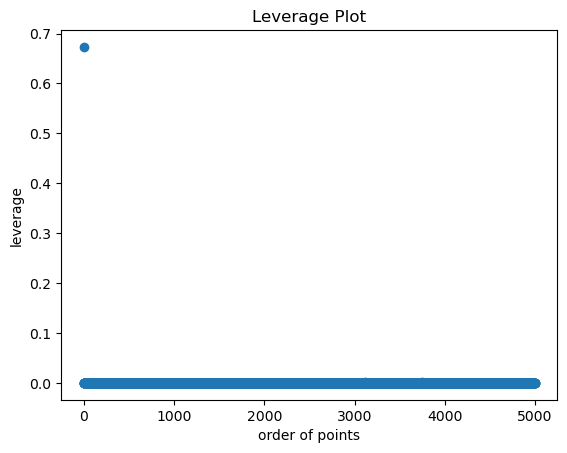

           x          y  residual  schmeverage  leverage  leverage_correction  \
0  10.000000  10.041441  6.544738     0.067316  0.673158             3.059581   
1   0.176405  -0.145433 -0.207117     0.001187  0.000209             1.000210   
2   0.040016  -0.113761 -0.127754     0.000269  0.000011             1.000011   
3   0.097874  -0.251566 -0.285789     0.000659  0.000064             1.000064   
4   0.224089  -0.280315 -0.358672     0.001508  0.000338             1.000338   

   influence    newton  
0  -0.440564 -1.347942  
1   0.000246  0.000246  
2   0.000034  0.000034  
3   0.000188  0.000188  
4   0.000541  0.000541  


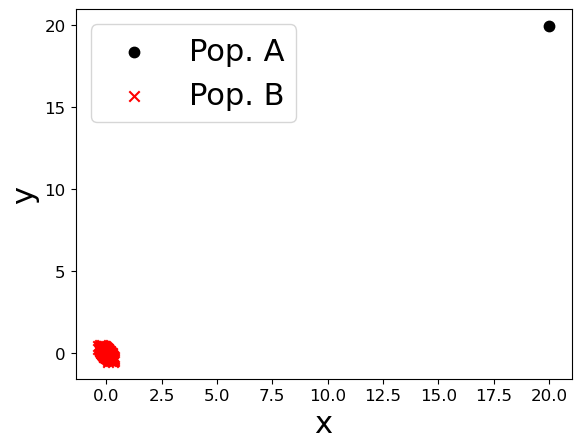

Beta with full dataset: [0.77760076]
Beta with subset dropped: [-1.00594992]
outlier_x: 20
outlier_y: 19.941896719337525


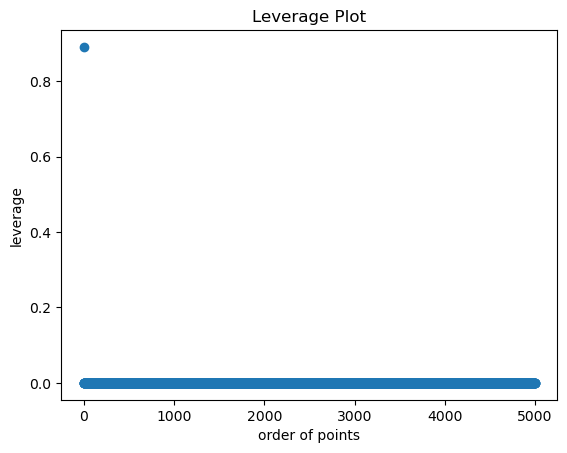

           x          y  residual  schmeverage      leverage  \
0  20.000000  19.941897  4.389881     0.044521  8.904198e-01   
1   0.129811  -0.149649 -0.250590     0.000289  3.751101e-05   
2  -0.020212   0.267210  0.282927    -0.000045  9.093700e-07   
3  -0.083323   0.142025  0.206817    -0.000185  1.545488e-05   
4   0.173360  -0.213095 -0.347900     0.000386  6.690102e-05   

   leverage_correction  influence    newton  
0             9.125735  -0.195442 -1.783551  
1             1.000038   0.000072  0.000072  
2             1.000001   0.000013  0.000013  
3             1.000015   0.000038  0.000038  
4             1.000067   0.000134  0.000134  


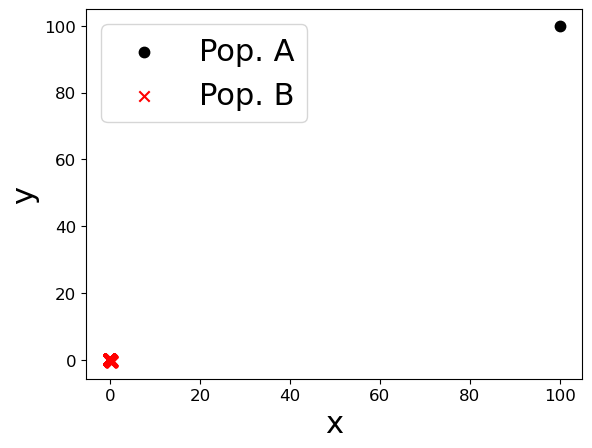

Beta with full dataset: [0.9896772]
Beta with subset dropped: [-0.99283038]
outlier_x: 100
outlier_y: 99.94393556859534


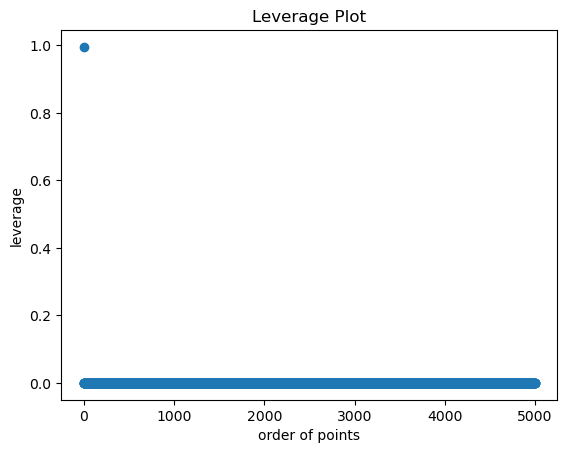

            x          y  residual   schmeverage      leverage  \
0  100.000000  99.943936  0.976216  9.951000e-03  9.951000e-01   
1   -0.105893  -0.070134  0.034667 -1.053742e-05  1.115841e-06   
2   -0.032653   0.076359  0.108674 -3.249284e-06  1.060984e-07   
3    0.033005  -0.002792 -0.035456  3.284287e-06  1.083965e-07   
4   -0.000048   0.014723  0.014770 -4.776275e-09  2.292514e-13   

   leverage_correction     influence        newton  
0           204.080907 -9.714322e-03 -1.982508e+00  
1             1.000001  3.652957e-07  3.652961e-07  
2             1.000000  3.531137e-07  3.531137e-07  
3             1.000000  1.164487e-07  1.164487e-07  
4             1.000000  7.054596e-11  7.054596e-11  


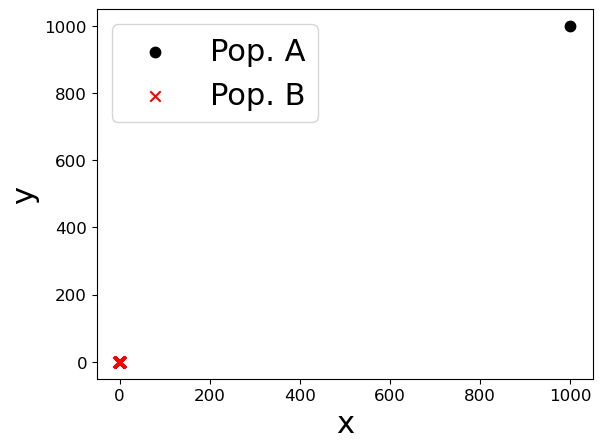

Beta with full dataset: [0.99979787]
Beta with subset dropped: [-1.03119887]
outlier_x: 1000
outlier_y: 999.9019043360779


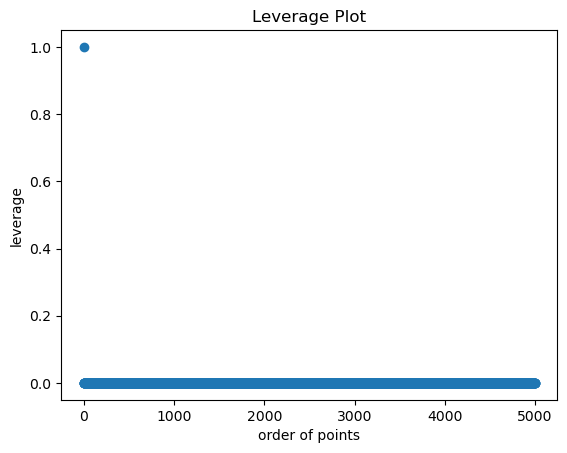

             x           y  residual   schmeverage      leverage  \
0  1000.000000  999.901904  0.104036  9.999488e-04  9.999488e-01   
1    -0.151128    0.046277  0.197374 -1.511199e-07  2.283839e-08   
2     0.097684   -0.084695 -0.182360  9.767938e-08  9.541750e-09   
3     0.125550    0.024569 -0.100956  1.255436e-07  1.576201e-08   
4     0.037123    0.001600 -0.035516  3.712131e-08  1.378062e-09   

   leverage_correction     influence        newton  
0         19523.095345 -1.040305e-04 -2.030997e+00  
1             1.000000  2.982710e-08  2.982710e-08  
2             1.000000  1.781279e-08  1.781279e-08  
3             1.000000  1.267434e-08  1.267434e-08  
4             1.000000  1.318393e-09  1.318393e-09  


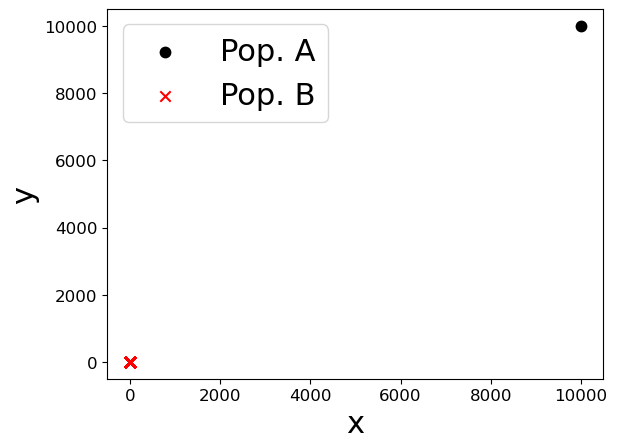

Beta with full dataset: [0.99999604]
Beta with subset dropped: [-0.99194589]
outlier_x: 10000
outlier_y: 9999.970169793554


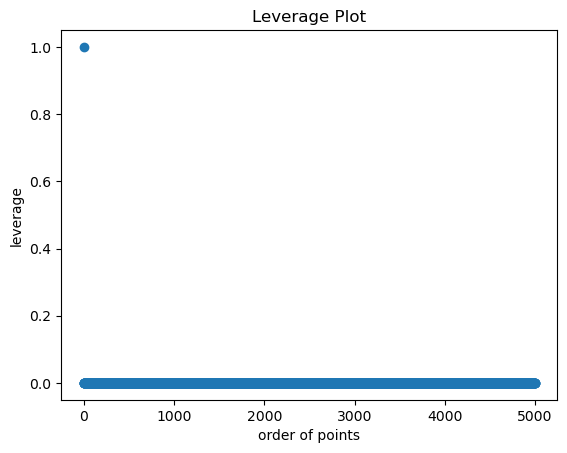

              x            y  residual   schmeverage      leverage  \
0  10000.000000  9999.970170  0.009758  9.999995e-05  9.999995e-01   
1      0.201111    -0.246942 -0.448052  2.011114e-09  4.044581e-10   
2      0.168986    -0.070753 -0.239738  1.689857e-09  2.855617e-10   
3      0.019997    -0.014745 -0.034742  1.999664e-10  3.998658e-12   
4     -0.122433     0.050749  0.173181 -1.224330e-09  1.498985e-10   

   leverage_correction     influence        newton  
0         2.041448e+06 -9.757496e-07 -1.991942e+00  
1         1.000000e+00  9.010840e-10  9.010840e-10  
2         1.000000e+00  4.051231e-10  4.051231e-10  
3         1.000000e+00  6.947187e-12  6.947187e-12  
4         1.000000e+00  2.120308e-10  2.120308e-10  


In [63]:
# Set seed before generating random numbers
np.random.seed(0)
num_dimensions = 1

num_observations_pop_1 = 1
num_observations_pop_2 = 4999

# set variance of pop. big
epsilon = 0.01
vars_pop_2 = [[epsilon]]

# set outlier
outlier_x_list = [[10], [20], [100], [1000], [10000]]

for outlier_x in outlier_x_list:
    x1 = np.expand_dims(outlier_x, axis=0)
    x2 = np.random.randn(1, num_observations_pop_2) * np.sqrt(vars_pop_2) # pop B
    # All x samples
    x = np.concatenate([x1, x2], axis=-1) 

    # generate y's.
    # True regression coefficients for both populations
    beta1 = [[1.0]]
    beta2 = [[-1.0]]
    # Generate Gaussian noise
    noise_stdev = 0.1
    epsilon1 = noise_stdev * np.random.randn(len(x1[0]), 1)
    epsilon2 = noise_stdev * np.random.randn(num_observations_pop_2, 1)
    # Generate observed values
    y1 = (x1.T @ beta1) + epsilon1
    y2 = (x2.T @ beta2) + epsilon2
    y = np.concatenate([y1, y2], axis=0)

    lr = plot_regression(x, y, x1, y1, x2, y2)

    orig_df = make_df(lr)
    ind = np.arange(0, 5000, 1)
    plt.scatter(ind, orig_df['leverage'])
    
    plt.xlabel("order of points")
    plt.ylabel('leverage')
    plt.title('Leverage Plot')
    plt.savefig(f'leverage-for-outlier-{outlier_x}')
    plt.show()
    
    print(orig_df[:5])